In [25]:
!pip install pandas

                                              0.0/10.8 MB ? eta -:--:--
                                              0.2/10.8 MB 7.4 MB/s eta 0:00:02
     --                                       0.6/10.8 MB 6.9 MB/s eta 0:00:02
     ---                                      1.0/10.8 MB 7.9 MB/s eta 0:00:02
     -----                                    1.4/10.8 MB 8.8 MB/s eta 0:00:02
     ------                                   1.9/10.8 MB 8.5 MB/s eta 0:00:02
     --------                                 2.2/10.8 MB 8.6 MB/s eta 0:00:02
     ---------                                2.4/10.8 MB 7.8 MB/s eta 0:00:02
     ----------                               2.8/10.8 MB 7.7 MB/s eta 0:00:02
     ------------                             3.3/10.8 MB 8.1 MB/s eta 0:00:01
     -------------                            3.7/10.8 MB 8.3 MB/s eta 0:00:01
     ---------------                          4.1/10.8 MB 8.5 MB/s eta 0:00:01
     -----------------                        4.6/10.8 MB 8

In [116]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [117]:
''' 
x[0]: Qsto1
x[1]: Qsto2
x[2]: Qgut
x[3]: Gp - Glucose mass in plasma and rapidly equilibrating tissues (mg/kg)
x[4]: Gt
x[5]: Ip 
x[6]: X - Insulin in the interstitial fluid (pmol/L)
x[8]: Id - Delayed insulin signal (pmol/l)
x[7]: I1
x[9]: Il
x[10]: Isc1
x[11]: Isc2
x[12]: Gsub







'''

df = pd.read_csv('vpatient_params.csv')
df

,Name,i,x0_ 1,x0_ 2,x0_ 3,x0_ 4,x0_ 5,x0_ 6,x0_ 7,x0_ 8,...,kd,ksc,ka1,ka2,dosekempt,u2ss,isc1ss,isc2ss,kp1,patient_history
0,adolescent#001,1,0,0,0,250.621836,176.506560,4.697518,0,97.554000,...,0.0185,0.0560,0.0025,0.0115,90000,1.216976,57.951224,93.225883,11.504823,0
1,adolescent#002,2,0,0,0,280.236267,30.954131,6.019305,0,119.180000,...,0.0163,0.1314,0.0068,0.0269,90000,1.798300,77.848476,47.172125,4.196579,0
2,adolescent#003,3,0,0,0,326.553380,383.368339,3.487881,0,101.280000,...,0.0149,0.1059,0.0030,0.0148,90000,1.446266,80.796984,81.342909,6.588789,0
3,adolescent#004,4,0,0,0,248.117090,214.758608,4.316765,0,108.880000,...,0.0155,0.0751,0.0026,0.0121,90000,1.762633,97.383030,124.746857,6.041685,0
4,adolescent#005,5,0,0,0,279.047113,144.715759,5.162898,0,113.090000,...,0.0151,0.0866,0.0032,0.0177,90000,1.534645,83.860398,71.541921,4.642232,0
5,adolescent#006,6,0,0,0,257.421705,162.558571,8.154419,0,113.000000,...,0.0180,0.0737,0.0061,0.0273,90000,1.927878,79.994952,52.743925,7.665231,0
6,adolescent#007,7,0,0,0,238.918844,87.961590,5.234234,0,111.900000,...,0.0176,0.0503,0.0041,0.0188,90000,2.049148,94.430770,88.403274,6.422606,0
7,adolescent#008,8,0,0,0,263.838120,33.927415,4.730161,0,82.914000,...,0.0174,0.0804,0.0035,0.0149,90000,1.353241,64.748395,75.612219,4.325662,0
8,adolescent#009,9,0,0,0,241.447500,184.846173,4.707833,0,84.982000,...,0.0167,0.0912,0.0027,0.0113,90000,1.381865,71.230166,105.269360,9.971336,0
9,adolescent#010,10,0,0,0,267.183741,169.711073,6.321865,0,108.240000,...,0.0144,0.1045,0.0034,0.0173,90000,1.661090,93.319683,77.676499,5.084551,0


In [118]:
df.columns

Index(['Name', 'i', 'x0_ 1', 'x0_ 2', 'x0_ 3', 'x0_ 4', 'x0_ 5', 'x0_ 6',
       'x0_ 7', 'x0_ 8', 'x0_ 9', 'x0_10', 'x0_11', 'x0_12', 'x0_13', 'BW',
       'EGPb', 'Gb', 'Ib', 'kabs', 'kmax', 'kmin', 'b', 'd', 'Vg', 'Vi', 'Ipb',
       'Vmx', 'Km0', 'k2', 'k1', 'p2u', 'm1', 'm5', 'CL', 'HEb', 'm2', 'm4',
       'm30', 'Ilb', 'ki', 'kp2', 'kp3', 'f', 'Gpb', 'ke1', 'ke2', 'Fsnc',
       'Gtb', 'Vm0', 'Rdb', 'PCRb', 'kd', 'ksc', 'ka1', 'ka2', 'dosekempt',
       'u2ss', 'isc1ss', 'isc2ss', 'kp1', 'patient_history'],
      dtype='object')

In [119]:

# Rename the 'snc' column to 'cns'
df = df.rename(columns={'x0_ 1': 'x0_1'})
df = df.rename(columns={'x0_ 2': 'x0_2'})
df = df.rename(columns={'x0_ 3': 'x0_3'})
df = df.rename(columns={'x0_ 4': 'x0_4'})
df = df.rename(columns={'x0_ 5': 'x0_5'})
df = df.rename(columns={'x0_ 6': 'x0_6'})
df = df.rename(columns={'x0_ 7': 'x0_7'})
df = df.rename(columns={'x0_ 8': 'x0_8'})
df = df.rename(columns={'x0_ 9': 'x0_9'})
df = df.rename(columns={'Fsnc': 'Fcns'})
df = df.rename(columns={'m30': 'm3'})

def value (pt:str, key:str):
    return df.loc[df['Name'] == pt, key].values[0]

value('adult#001', 'BW')


102.32

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [120]:
''' 
Initialization
'''
pt = 'adult#001'
BW = value(pt, 'BW')
print (f'BW: {BW}')
Qsto1 = value(pt, 'x0_1')  # x[0]
print (f'Qsto1: {Qsto1}')
Qsto2 = value(pt, 'x0_2')
print (f'Qsto2: {Qsto2}')
Qgut = value(pt, 'x0_3')
print (f'Qgut: {Qgut}')
Gp = value(pt, 'x0_4')  # = value(pt, 'Gpb')
print (f'Gp: {Gp}')
Gt = value(pt, 'x0_5')  
print (f'Gt: {Gt}')
Ip = value(pt, 'x0_6')  
print (f'Ip: {Ip}')
X = value(pt, 'x0_7')
print (f'X: {X}')
I1 = value(pt, 'x0_8')
print (f'I1: {I1}')
Id = value(pt, 'x0_9')
print (f'Id: {Id}')
Il = value(pt, 'x0_10')
print (f'Il: {Il}')
Isc1 = value(pt, 'x0_11')
print (f'Isc1: {Isc1}')
Isc2 = value(pt, 'x0_12')
print (f'Isc2: {Isc2}')
Gsub = value(pt, 'x0_13')
print (f'Gsub: {Gsub}')


BW: 102.32
Qsto1: 0
Qsto2: 0
Qgut: 0
Gp: 265.370112
Gt: 162.457097269
Ip: 5.5043265
X: 0
I1: 100.25
Id: 100.25
Il: 3.20762505142
Isc1: 72.4341762342
Isc2: 141.153779328
Gsub: 265.370112


In [121]:
# Inputs

D = 5000  # 5 g of glucose

u2ss = value(pt, 'u2ss')
print (f'u2ss: {u2ss}')

basal = u2ss * BW / 6000  # U/min
print (f'basal: {basal}')

insulin = 0.0 # U/min

if insulin > basal:
    insulin = insulin * 6000 / BW  # U/min -> pmol/kg/min
print (f'insulin: {insulin}')


u2ss: 1.2386244136
basal: 0.02112267499992533
insulin: 0.0


In [123]:
kmax = value(pt, 'kmax')
print (f'kmax: {kmax}')
kmin = value(pt, 'kmin')
print (f'kmin: {kmin}')
b = value(pt, 'b')
print (f'b: {b}')
d = value(pt, 'd')  # shown as 'c' in the paper
print (f'd: {d}')
kabs = value(pt, 'kabs')
print (f'kabs: {kabs}')
f = value(pt, 'f')
print (f'f: {f}')


Qsto = Qsto1 + Qsto2
print(f'old Qsto1: {Qsto1}')
print(f'old Qsto2: {Qsto2}')
print(f'old Qsto: {Qsto}')

Qsto1 = Qsto1 - kmax * Qsto1 + D
alpha = 5 / (2 * D * (1 - b))
beta = 5 / (2 * D * c)
kempt = kmin + 0.5*(kmax - kmin)*(np.tanh(alpha*(Qsto - b*D)) - np.tanh(beta*(Qsto - c*D)) + 2)
Qsto2 = Qsto2 - kempt * Qsto2 + kmax * Qsto1
Qgut = Qgut - kabs * Qgut + kempt * Qsto2
Ra = f * kabs * Qgut / BW
print(f'kempt: {kempt}')
print(f'new Qsto1: {Qsto1}')
print(f'new Qsto2: {Qsto2}')
print(f'Qgut: {Qgut}')
print(f'Ra: {Ra}')

# Glucose production
kp1 = value(pt, 'kp1')
print (f'kp1: {kp1}')
kp2 = value(pt, 'kp2')
print (f'kp2: {kp2}')
kp3 = value(pt, 'kp3')
print (f'kp3: {kp3}')
EGP = kp1 - kp2 * Gp - kp3 * Id
print (f'EGP: {EGP}')

# Glucose utilization
Fcns = value(pt, 'Fcns')
print (f'Fcns: {Fcns}')
Uii = Fcns
print (f'Uii: {Uii}')

# Renal excretion
ke2 = value(pt, 'ke2')
print (f'ke2: {ke2}')
ke1 = value(pt, 'ke1')
print (f'ke1: {ke1}')
if Gp > ke2:
    E = ke1 * (Gp - ke2)
else:
    E = 0
print (f'Gp: {Gp}')
print (f'E: {E}')

# Glucose kinetics

k1 = value(pt, 'k1')
print (f'k1: {k1}')
k2 = value(pt, 'k2')
print (f'k2: {k2}')

Gp = Gp + max(EGP, 0) + Ra - Uii - E - k1 * Gp + k2 * Gt
if Gp < 0: Gp = 0
print (f'Gp: {Gp}')

Vm0 = value(pt, 'Vm0')
print (f'Vm0: {Vm0}')
Vmx = value(pt, 'Vmx')
print (f'Vmx: {Vmx}')

Vm = Vm0 + Vmx * X
print (f'Vm: {Vm}')

Km0 = value(pt, 'Km0')
Uid = Vm * Gt / (Km0 + Gt)
print (f'Uid: {Uid}')
Gt = Gt - Uid + k1 * Gp - k2 * Gt
if Gt < 0: Gt = 0
print (f'Gt: {Gt}')

# Insulin kinetics

m1 = value(pt, 'm1')
print (f'm1: {m1}')
m2 = value(pt, 'm2')
print (f'm2: {m2}')
m3 = value(pt, 'm3')
print (f'm3: {m3}')
m4 = value(pt, 'm4')
print (f'm4: {m4}')
ka1 = value(pt, 'ka1')
print (f'ka1: {ka1}')
ka2 = value(pt, 'ka2')
print (f'ka2: {ka2}')

Ip = Ip - (m2 + m4) * Ip + m1 * Il + ka1 * Isc1 + ka2 * Isc2
if Ip < 0: Ip = 0
print (f'Ip: {Ip}')

Vi = value(pt, 'Vi')
print (f'Vi: {Vi}')

I = Ip / Vi
print (f'I: {I}')

p2u = value(pt, 'p2u')
print (f'p2u: {p2u}')
Ib = value(pt, 'Ib')
print (f'Ib: {Ib}')

# Insulin action on glucose utilization
X = X - p2u * X + p2u * (I - Ib)
if X < 0: X = 0
print (f'X: {X}')

# Insulin action on production
ki = value(pt, 'ki')
print (f'ki: {ki}')
I1 = I1 -ki * (I1 - I)
print (f'I1: {I1}')
Id = Id - ki * (Id - I1)

# Insulin in the liver (pmol/kg)
Il = Il -(m1 + m3) * Il + m2 * Ip
if Il < 0: Il = 0
print (f'Il: {Il}')

# subcutaneous insulin kinetics
kd = value(pt, 'kd')
print (f'kd: {kd}')
Isc1 = Isc1 + insulin - (ka1 + kd) * Isc1
if Isc1 < 0: Isc1 = 0
print (f'Isc1: {Isc1}')

Isc2 = Isc2 + kd * Isc1 - ka2 * Isc2
if Isc2 < 0: Isc2 = 0
print (f'Isc2: {Isc2}')

# subcutaneous glucose
ksc = value(pt, 'ksc')
print (f'ksc: {ksc}')
Gsub = Gsub + (-ksc * Gsub + ksc * Gp)
if Gsub < 0: Gsub = 0
print (f'Gsub: {Gsub}')






kmax: 0.046122
kmin: 0.0037927
b: 0.70391
d: 0.21057
kabs: 0.08906
f: 0.9
old Qsto1: 5000.0
old Qsto2: 230.61
old Qsto: 5230.61
kempt: 0.045991510041618444
new Qsto1: 9769.39
new Qsto2: 670.5877034493024
Qgut: 40.47082309016942
Ra: 0.031703463193602816
kp1: 4.73140582528
kp2: 0.00469
kp3: 0.01208
EGP: 2.281197456213479
Fcns: 1
Uii: 1
ke2: 339
ke1: 0.0005
Gp: 265.37839290540023
E: 0
k1: 0.058138
k2: 0.087114
Gp: 265.4150543293143
Vm0: 3.2667306607
Vmx: 0.031319
Vm: 3.2667306607
Uid: 1.2758023042236006
Gt: 162.46014731737264
m1: 0.15446
m2: 0.225027424083
m3: 0.23169
m4: 0.090010969633
ka1: 0.0019
ka2: 0.0078
Ip: 3.7702523209497936
Vi: 0.054906
I: 68.66740102993832
p2u: 0.027802
Ib: 100.25
X: 0
ki: 0.0046374
I1: 0.30356316512313675
Il: 0.8484101679261472
kd: 0.0152
Isc1: 0.0
Isc2: 0.0
ksc: 0.0766
Gsub: 0.00344258242547113


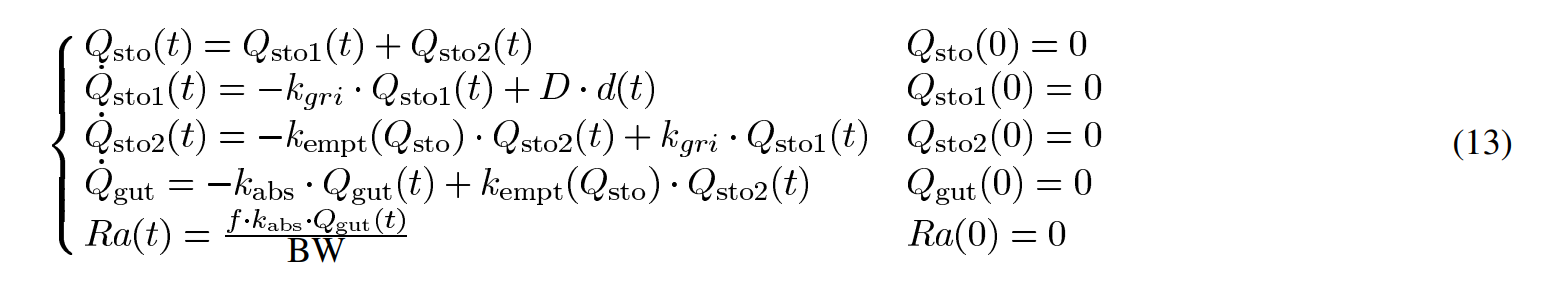
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiJn6eEsLr_AhUtAjQIHRe5CnkQFnoECA0QAQ&url=https%3A%2F%2Ffiles.gitter.im%2Fnightscout%2Fintend-to-bolus%2F0B8R%2FA-System-Model-of-Oral-Glucose-Absorption.pdf&usg=AOvVaw2ilPclTl9iks_G1qUDpd0j&cshid=1686457605761029
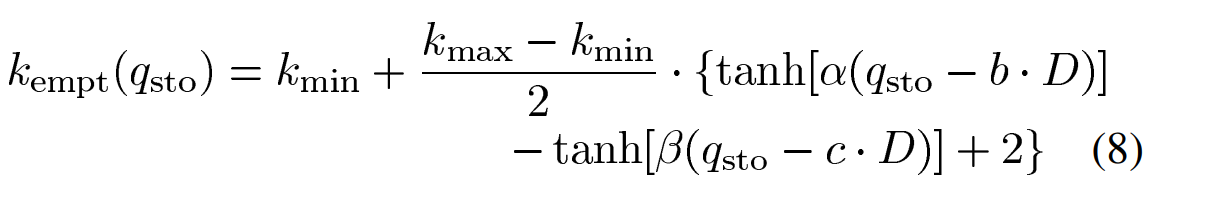
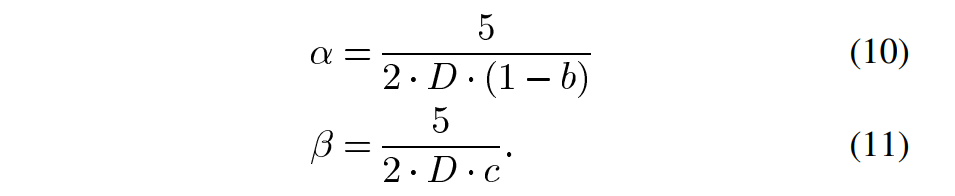

In [76]:
'''
Glucose Rate of Appearance

The given code snippet appears to be part of a mathematical model that calculates the rate of appearance 
of glucose in the plasma based on various parameters and constants:Vari

Calculating kempt:
Calculate the rate constant of gastric emptying, kempt, using the provided coefficients 
and the values of Qsto1 and D. It uses a sigmoid-like function to determine kempt based 
on the glucose levels in the stomach.

Updating glucose amounts:
Update the values of Qsto1, Qsto2, and Qgut based on their previous values and the respective rate constants. 
The amounts are adjusted by considering the rates of grinding, gastric emptying, and intestinal absorption.

Calculating Ra:
Multiply the fraction of absorbed glucose that appears in the plasma (f) with the rate of intestinal absorption (kabs) 
and the amount of glucose in the intestine (Qgut). The result is divided by the body weight (BW) to obtain 
the rate in mg/kg/min.

Variables:
Qsto: Amount of glucose in the stomach in both solid and liquid phases (mg)
Qsto1: Amount of glucose in the stomach in solid phase (mg)
Qsto2: Amount of glucose in the stomach in liquid phase (mg)
Qgut: Amount of glucose mass in the intestine (mg)
kmax and kmin: Maximum and minimum values for the rate constant of grinding (1/min) 
b and d: Coefficients used in the calculation of kempt.
kempt: Rate constant of gastric emptying (1/min)
kabs: Rate constant of intestinal absorption (1/min)
f: Fraction of intestinal absorption which actually appears in plasma
D: Amount of ingested glucose (mg)
BW: Body weight (kg)
Ra: Rate of appearance of glucose in plasma (mg/kg/min)

kmax = 0.0558 # T2: 0.0465
kmin = 0.008 # T2: 0.0076
kabs = 0.057 # T2: 0.023
kgri = 0.0558 # T2: 0.0465
f = 0.9 # T2: 0.9
a = 0.00013 # T2: 0.00006
b = 0.82 # T2: 0.68
c = 0.00236 # T2: 0.00023 
d = 0.010 # T2: 0.09
'''

kmax = value(pt, 'kmax')
print (f'kmax: {kmax}')
kmin = value(pt, 'kmin')
print (f'kmin: {kmin}')
b = value(pt, 'b')
print (f'b: {b}')
d = value(pt, 'd')  # shown as 'c' in the paper
print (f'd: {d}')
kabs = value(pt, 'kabs')
print (f'kabs: {kabs}')
f = value(pt, 'f')
print (f'f: {f}')


Qsto = Qsto1 + Qsto2
print(f'old Qsto1: {Qsto1}')
print(f'old Qsto2: {Qsto2}')
print(f'old Qsto: {Qsto}')

Qsto1 = Qsto1 - kmax * Qsto1 + D
alpha = 5 / (2 * D * (1 - b))
beta = 5 / (2 * D * c)
kempt = kmin + 0.5*(kmax - kmin)*(np.tanh(alpha*(Qsto - b*D)) - np.tanh(beta*(Qsto - c*D)) + 2)
Qsto2 = Qsto2 - kempt * Qsto2 + kmax * Qsto1
Qgut = Qgut - kabs * Qgut + kempt * Qsto2
Ra = f * kabs * Qgut / BW
print(f'kempt: {kempt}')
print(f'new Qsto1: {Qsto1}')
print(f'new Qsto2: {Qsto2}')
print(f'Qgut: {Qgut}')
print(f'Ra: {Ra}')



kmax: 0.046122
kmin: 0.0037927
b: 0.70391
d: 0.21057
kabs: 0.08906
f: 0.9
old Qsto1: 0
old Qsto2: 0
old Qsto: 0
kempt: 0.04583898756812334
new Qsto1: 5000.0
new Qsto2: 230.61
Qgut: 10.570928923084924
Ra: 0.008280905364551887


In [77]:
# Glucose production
kp1 = value(pt, 'kp1')
print (f'kp1: {kp1}')
kp2 = value(pt, 'kp2')
print (f'kp2: {kp2}')
kp3 = value(pt, 'kp3')
print (f'kp3: {kp3}')
EGP = kp1 - kp2 * Gp - kp3 * Id
print (f'EGP: {EGP}')

kp1: 4.73140582528
kp2: 0.00469
kp3: 0.01208
EGP: 2.2758000000000007


In [82]:
# Glucose utilization
Fcns = value(pt, 'Fcns')
print (f'Fcns: {Fcns}')
Uii = Fcns
print (f'Uii: {Uii}')

Fcns: 1
Uii: 1


In [85]:
# Renal excretion
ke2 = value(pt, 'ke2')
print (f'ke2: {ke2}')
ke1 = value(pt, 'ke1')
print (f'ke1: {ke1}')
if Gp > ke2:
    E = ke1 * (Gp - ke2)
else:
    E = 0
print (f'Gp: {Gp}')
print (f'E: {E}')

ke2: 339
ke1: 0.0005
Gp: 265.370112
E: 0


In [100]:
# Glucose kinetics

k1 = value(pt, 'k1')
print (f'k1: {k1}')
k2 = value(pt, 'k2')
print (f'k2: {k2}')

Gp = Gp + max(EGP, 0) + Ra - Uii - E - k1 * Gp + k2 * Gt
if Gp < 0: Gp = 0
print (f'Gp: {Gp}')

Vm0 = value(pt, 'Vm0')
print (f'Vm0: {Vm0}')
Vmx = value(pt, 'Vmx')
print (f'Vmx: {Vmx}')

Vm = Vm0 + Vmx * X
print (f'Vm: {Vm}')

Km0 = value(pt, 'Km0')
Uid = Vm * Gt / (Km0 + Gt)
print (f'Uid: {Uid}')
Gt = Gt - Uid + k1 * Gp - k2 * Gt
if Gt < 0: Gt = 0
print (f'Gt: {Gt}')


# G = Gp / Vg

k1: 0.058138
k2: 0.087114
Gp: 265.37839290540023
Vm0: 3.2667306607
Vmx: 0.031319
Vm: 3.266730660699804
Uid: 1.2758000000027465
Gt: 162.45757870423975


In [110]:
# Insulin kinetics

m1 = value(pt, 'm1')
print (f'm1: {m1}')
m2 = value(pt, 'm2')
print (f'm2: {m2}')
m3 = value(pt, 'm3')
print (f'm3: {m3}')
m4 = value(pt, 'm4')
print (f'm4: {m4}')
ka1 = value(pt, 'ka1')
print (f'ka1: {ka1}')
ka2 = value(pt, 'ka2')
print (f'ka2: {ka2}')

Ip = Ip - (m2 + m4) * Ip + m1 * Il + ka1 * Isc1 + ka2 * Isc2
if Ip < 0: Ip = 0
print (f'Ip: {Ip}')

Vi = value(pt, 'Vi')
print (f'Vi: {Vi}')

I = Ip / Vi
print (f'I: {I}')

p2u = value(pt, 'p2u')
print (f'p2u: {p2u}')
Ib = value(pt, 'Ib')
print (f'Ib: {Ib}')

# Insulin action on glucose utilization
X = X - p2u * X + p2u * (I - Ib)
if X < 0: X = 0
print (f'X: {X}')

# Insulin action on production
ki = value(pt, 'ki')
print (f'ki: {ki}')
I1 = Il -ki * (I1 - I)
print (f'I1: {I1}')
Id = Id - ki * (Id - I1)

# Insulin in the liver (pmol/kg)
Il = -(m1 + m3) * Il + m2 * Ip
if Il < 0: Il = 0
print (f'Il: {Il}')

# subcutaneous insulin kinetics
kd = value(pt, 'kd')
print (f'kd: {kd}')
Isc1 = insulin - (ka1 + kd) * Isc1
if Isc1 < 0: Isc1 = 0
print (f'Isc1: {Isc1}')

Isc2 = kd * Isc1 - ka2 * Isc2
if Isc2 < 0: Isc2 = 0
print (f'Isc2: {Isc2}')

# subcutaneous glucose
ksc = value(pt, 'ksc')
print (f'ksc: {ksc}')
Gsub = (-ksc * Gsub + ksc * Gp)
if Gsub < 0: Gsub = 0
print (f'Gsub: {Gsub}')




m1: 0.15446
m2: 0.225027424083
m3: 0.23169
m4: 0.090010969633
ka1: 0.0019
ka2: 0.0078
Ip: 4.8436098821962235
Vi: 0.054906
I: 88.21640407598848
p2u: 0.027802
Ib: 100.25
X: 0
ki: 0.0046374
I1: 1.534336495486155
Il: 0.6547020180167162


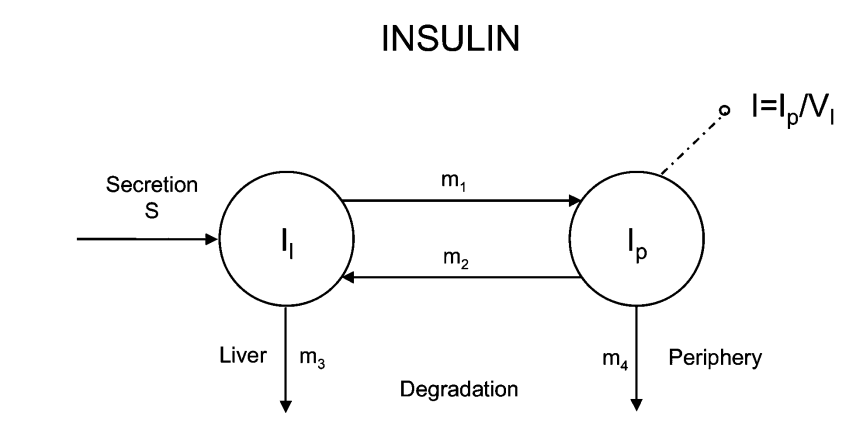
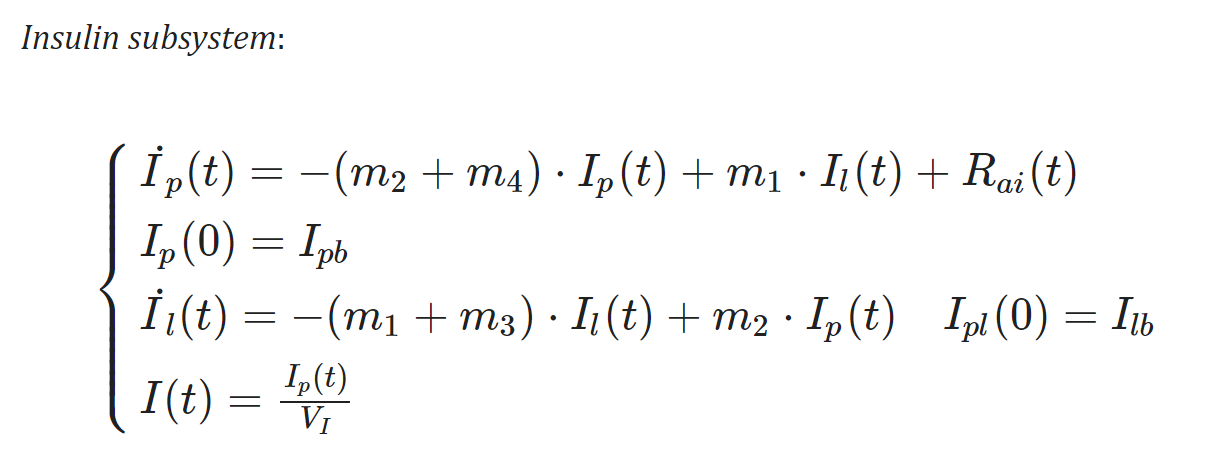


In [22]:
'''
Insulin Subsystem

Ip: Insulin mass in plasma (pmol/kg)
Il: Insulin mass in liver (pmol/kg)
I: Plasma insulin concentration (pmol/L)
Suffix b: Basal state
S: Insulin secretion (pmol/kg/min)
VI: Distribution volume of insulin (L/kg)
m1: Rate constant for the conversion from insulin mass in liver to insulin mass in plasma (1/min)
m2: Rate constant for the conversion from insulin mass in plasma to insulin mass in liver (1/min)
m3: Rate constant for the degradation of insulin mass in liver (1/min)
m4: Rate constant for the degradation of insulin mass in plasma (1/min)
HE: Hepatic extraction of insulin
The hepatic extraction ratio of insulin is defined as the quantity of insulin that leaves 
the liver irreversibly (i.e., the insulin that is taken up and metabolized by the liver), 
divided by the total quantity of insulin that leaves the liver (both the insulin that is metabolized 
and the insulin that simply passes through to the systemic circulation).

'''

VI = 0.05 # T2: 0.04 
m1 = 0.190  # T2: 0.379
m2 = 0.484  # T2: 0.673
m4 = 0.194 # T2: 0.269
m5 = 0.0304 # T2: 0.0526
m6 = 0.6471 # T2: 0.8118
HEb  = 0.6 # T2: 0.6

HE = -m5 * S + m6
m3 = (HE * m1) / (1 - HE)
Il = Il - (m1 + m3) * Il + m2 * Ip 
Ip = Ip - (m2 + m4) * Ip + m1 * Il 
I = Ip / VI


NameError: name 'S' is not defined

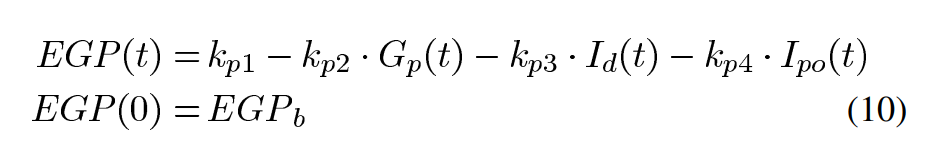
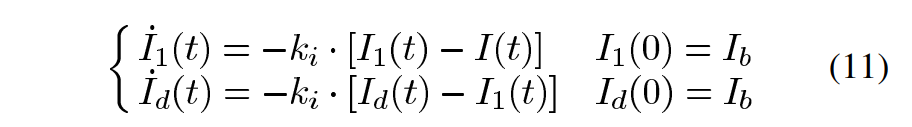

In [20]:
'''
Endogenous Glucose Production (EGP)

EGP: Endogenous glucose production rate (mg/kg/min)
kp1: Extrapolated EGP at zero glucose and insulin (mg/kg/min)
kp2: Liver glucose effectiveness - the ability of liver to suppress its own production, independent of insulin (1/min)
Gp: Glucose mass in plasma and rapidly equilibrating tissues (mg/kg)
kp3: Parameter governing amplitude of insulin action on the liver (mg/kg/min per pmol/l)
kp4: Parameter governing amplitude of portal insulin action on the liver (mg/kg/min per pmol/kg)
The distinction between kp3 and kp4 lies in the reference used for the concentration of insulin.
While kp3 considers the concentration of insulin in the bloodstream (pmol/l), 
kp4 takes into account the mass of insulin delivered to the liver through the portal vein (pmol/kg).
Id: Delayed insulin signal (pmol/l)
Ipo: Amount of insulin in the portal vein (pmol/kg)
ki: Rate parameter accounting for delay between insulin signal and insulin action (1/min)

'''

kp1 = 2.70  # T2: 3.09
kp2 = 0.0021 # T2: 0.0007
kp3 = 0.009 # T2: 0.005
kp4 = 0.0618 # T2: 0.0786
ki = 0.0079 # T2: 0.0066

I1 = I1 - ki * (I1 - I)
Id = Id - ki * (Id - I1)

EGP = kp1 - kp2 * Gp - kp3 * Id - kp4 * Ipo

if EGP < 0:
    EGP = 0 
    
    

NameError: name 'I1' is not defined

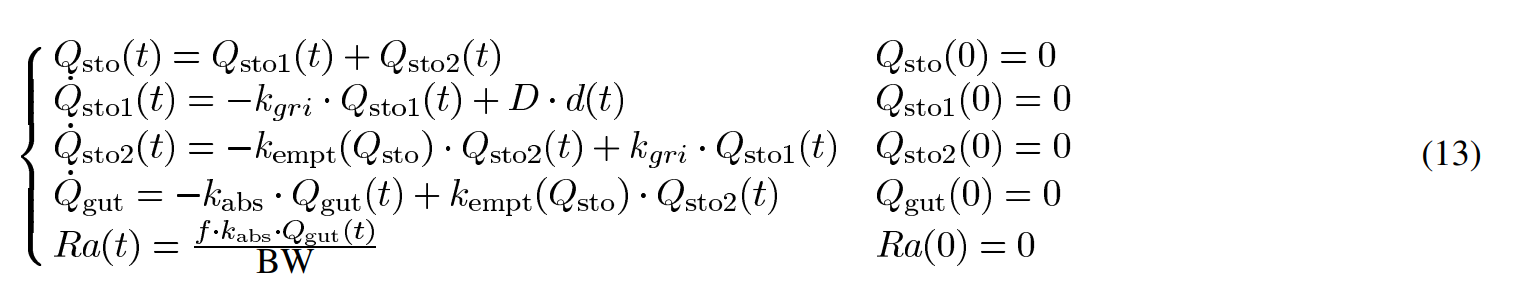
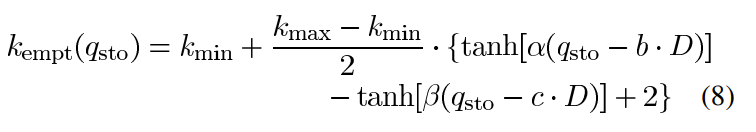

In [19]:
'''
Glucose Rate of Appearance

The given code snippet appears to be part of a mathematical model that calculates the rate of appearance 
of glucose in the plasma based on various parameters and constants:Vari

Calculating kempt:
Calculate the rate constant of gastric emptying, kempt, using the provided coefficients 
and the values of Qsto1 and D. It uses a sigmoid-like function to determine kempt based 
on the glucose levels in the stomach.

Updating glucose amounts:
Update the values of Qsto1, Qsto2, and Qgut based on their previous values and the respective rate constants. 
The amounts are adjusted by considering the rates of grinding, gastric emptying, and intestinal absorption.

Calculating Ra:
Multiply the fraction of absorbed glucose that appears in the plasma (f) with the rate of intestinal absorption (kabs) 
and the amount of glucose in the intestine (Qgut). The result is divided by the body weight (BW) to obtain 
the rate in mg/kg/min.

Variables:
Qsto: Amount of glucose in the stomach in both solid and liquid phases (mg)
Qsto1: Amount of glucose in the stomach in solid phase (mg)
Qsto2: Amount of glucose in the stomach in liquid phase (mg)
Qgut: Amount of glucose mass in the intestine (mg)
kmax and kmin: Maximum and minimum values for the rate constant of grinding (1/min) 
kgri: Rate constant of grinding (1/min)
a, b, and c: Coefficients used in the calculation of kempt.
kempt: Rate constant of gastric emptying (1/min)
kabs: Rate constant of intestinal absorption (1/min)
f: Fraction of intestinal absorption which actually appears in plasma
D: Amount of total glucose in stomach and ingested (mg)
food_taken: Amount of ingested glucose for the previous 1 min (mg)
BW: Body weight (kg)
Ra: Rate of appearance of glucose in plasma (mg/kg/min)
'''

kmax = 0.0558 # T2: 0.0465
kmin = 0.008 # T2: 0.0076
kabs = 0.057 # T2: 0.023
kgri = 0.0558 # T2: 0.0465
f = 0.9 # T2: 0.9
a = 0.00013 # T2: 0.00006
b = 0.82 # T2: 0.68
c = 0.00236 # T2: 0.00023 
d = 0.010 # T2: 0.09
food_taken = 1000


Qsto = Qsto1 + Qsto2
print(f'old Qsto1: {Qsto1}')
print(f'old Qsto2: {Qsto2}')
print(f'old Qsto: {Qsto}')

D = Qsto + food_taken

kempt = kmin + 0.5*(kmax - kmin)*(np.tanh(a*(Qsto - b*D)) - np.tanh(b*(Qsto - c*D)) + 2)
Qsto1 = Qsto1 - kgri * Qsto1 + D
Qsto2 = Qsto2 - kempt * Qsto2 + kgri * Qsto1
Qgut = Qgut - kabs * Qgut + kempt * Qsto2
Ra = f * kabs * Qgut / BW
print(f'kempt: {kempt}')
print(f'new Qsto1: {Qsto1}')
print(f'new Qsto2: {Qsto2}')
print(f'Qgut: {Qgut}')
print(f'Ra: {Ra}')



old Qsto1: 0
old Qsto2: 0
old Qsto: 0
kempt: 0.056673609257806026
new Qsto1: 20.0
new Qsto2: 1.116
Qgut: 0.06324774793171153
Ra: 4.635156384138288e-05


In [ ]:
EGP = kp1 - kp2 * Gp - kp3 * Id - kp4 * Ipo

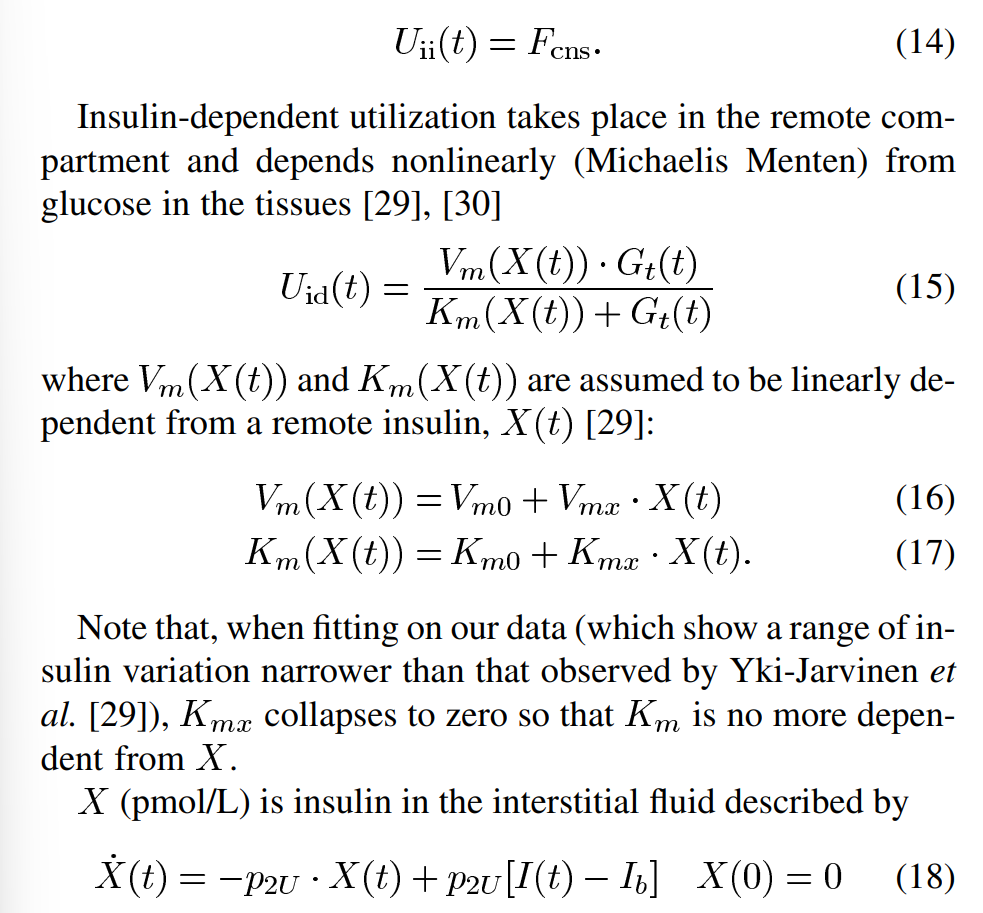
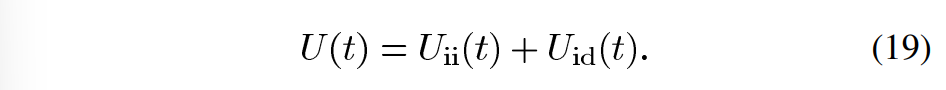

In [ ]:
''' 
Glucose Utilization

Fcns: Non-insulin-dependent glucose utilization by brain and erythrocytes (mg/kg/min)
X: Insulin in the interstitial fluid (pmol/L)
I: Plasma insulin concentration (pmol/L)
Ib: Basal plasma insulin concentration (pmol/L)

'''
Fcns = 1 # T2: 1
Uii = Fcns
Vm0 = 2.50 # T2: 4.65
Vmx = 0.047 # T2: 0.034
Km0 = 225.59 # T2: 466.21
p2U = 0.0331 # T2: 0.0840

X = X - p2U * X + p2U * (I - Ib)
Vm = Vm0 + Vmx * X
Km = Km0 + Kmx * X
Uid = Vm * Gt / (Km + Gt)
U = Uii + Uid






NameError: name 'X' is not defined

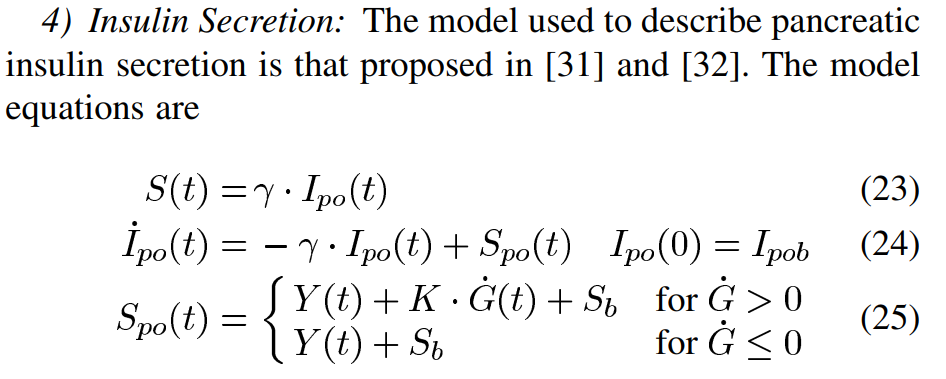
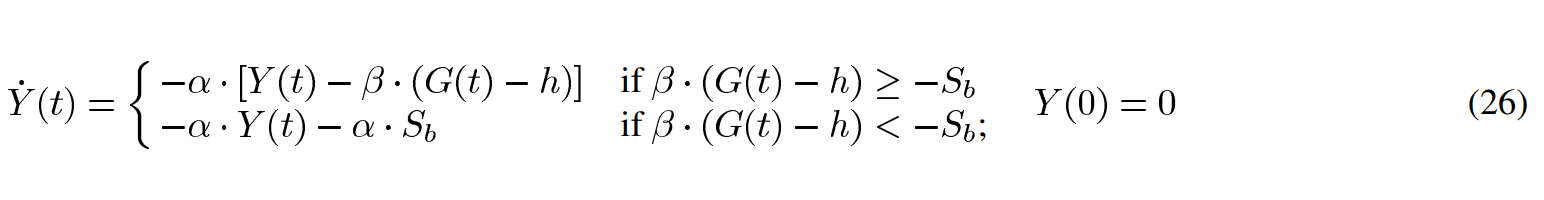

In [ ]:
''' 
r: Transfer rate between portal vein and liver (1/min)
K: Pancreatic responsivity to glucose rate of change (pmol/kg per mg/dl)
a: Delay between glucose signal and insulin secretion (1/min)
b: Pancreatic responsivity to glucose (pmol/kg/min per mg/dl)
h: Threshold level of glucose above which the beta cells initiate to produce new insulin (mg/dl)

'''

K = 2.30 # T2: 0.99
alpha: 0.050 # T2: 0.013
beta: 0.11 # T2: 0.5
gamma: 0.5 # T2: 0.5

if (beta * (G - h) >= -Sb):
    Y = Y -alpha*(Y - beta*(G - h))
else:
    Y = Y -alpha*Y - alpha* Sb
    
if dG > 0:
    Spo = Y + K * dG + Sb
else:
    Spo = Y + Sb
Ipo = Ipo - gamma * Ipo + gamma + Spo
S = gamma * Ipo

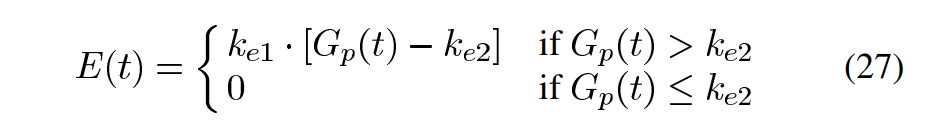

In [ ]:
'''
ke1: Glomerular filtration rate (1/min)
ke2: Renal threshold for glucose (mg/kg)
'''

if Gp > ke2:
    E = ke1 * (Gp - ke2)
else:    
    E = 0   

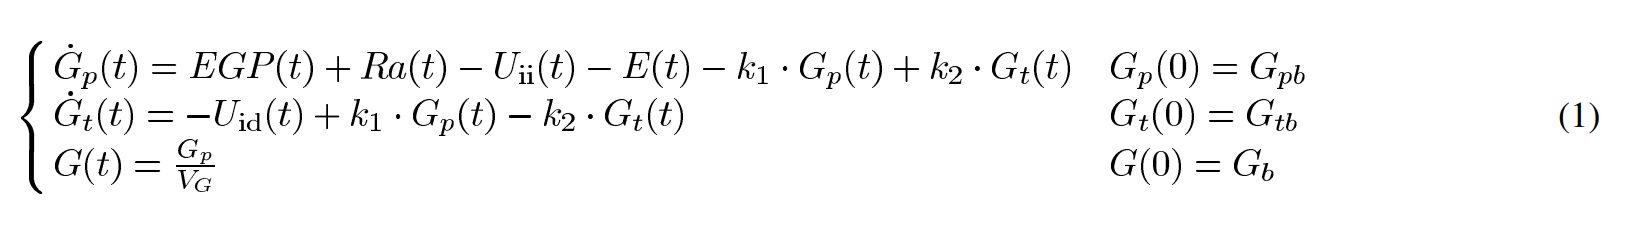
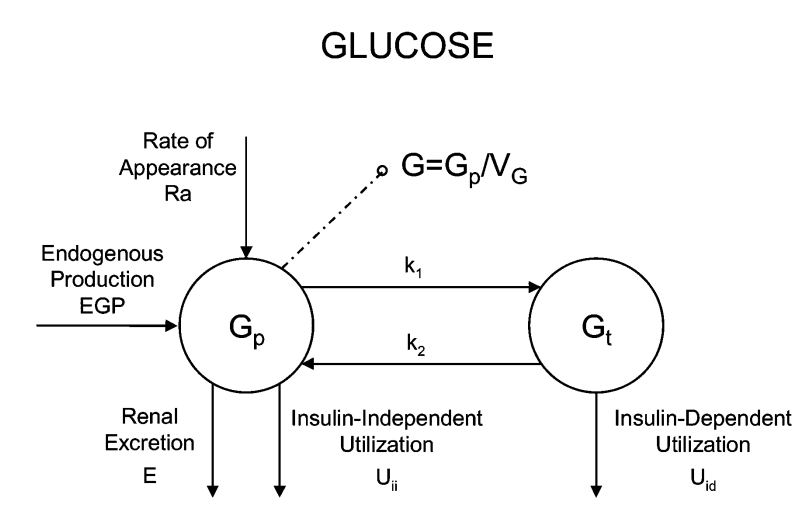

In [ ]:
''' 
Glucose Kinetics

Gp: Glucose mass in plasma and rapidly equilibrating tissues (mg/kg)
Gt: Glucose mass in slowly equilibrating tissues (mg/kg)
G: Plasma glucose concentration (mg/dL)
Vg: Volume of distribution of glucose (dL/kg)
EGP: Endogenous glucose production (mg/kg/min)
Ra: Glucose rate of appearance in plasma (mg/kg/min)
E: Renal excretion rate of glucose (mg/kg/min)
Uii: Rate of glucose uptake by insulin-independent tissues (mg/kg/min)
Uid: Rate of glucose uptake by insulin-dependent tissues (mg/kg/min)


'''
Vg = 1.88 # T2: 1.49
k1 = 0.065 # T2: 0.042
k2 = 0.079 # T2: 0.071


Gp = Gp + EGP + Ra - Uii - E - k1 * Gp + k2 * Gt
Gt = Gt - Uid + k1 * Gp - k2 * Gt
G = Gp / Vg

NameError: name 'Gp' is not defined